## Import libaray

In [1]:
import requests, json
from bs4 import BeautifulSoup
import datetime
import re
import jieba.analyse
import glob, os
import time
from PIL import Image

## Download data from Appledaily News

In [22]:
SearchString = "離岸風電"

StartDate_Str = '20190202'

EndDate_Str = '20190301'

StartDate = datetime.datetime.strptime(StartDate_Str,'%Y%m%d')
EndDate = datetime.datetime.strptime(EndDate_Str,'%Y%m%d')

SearchPage = 0

# Define desired replacements for non-chinese words
rep = {
        "GW": "兆瓦", 
        "MW": "萬千瓦", 
        "0": "零",
        "1": "一",
        "2": "二",
        "3": "三",
        "4": "四",
        "5": "五",
        "6": "六",
        "7": "七",
        "8": "八",
        "8": "九" 
      }


while (True):
    
    time.sleep(3)

    SearchPage = SearchPage+1
    # url ="https://www.cna.com.tw/cna2018api/api/simplelist/searchkeyword/%E9%9B%A2%E5%B2%B8%E9%A2%A8%E9%9B%BB/pageidx/1/"
    url = (
           "https://www.cna.com.tw/cna2018api/api/simplelist/searchkeyword/{}".format(SearchString) + 
           "/pageidx/{}/".format(SearchPage)
          )

    webdata = requests.get(url).text

    reqsjson = json.loads(webdata)['result']['SimpleItems']

    for content in reqsjson:
        
        article_title = content['HeadLine']

        article_publish_date = content['CreateTime']

        article_data = requests.get("https://www.cna.com.tw"+ content['PageUrl']).text

        article_data_suop = BeautifulSoup(article_data, 'html.parser')

        article_paragraph_list = article_data_suop.find('div',class_='paragraph').find_all('p')
        article_text_list = []
        
        for article_paragraph in article_paragraph_list:
            article_text_list.append(article_paragraph.get_text())

        article_text = ''.join(article_text_list)

        # use these three lines to do the replacement
        rep = dict((re.escape(k), v) for k, v in rep.items())
        pattern = re.compile("|".join(rep.keys()))
        article_text = pattern.sub(lambda m: rep[re.escape(m.group(0))], article_text)

        article_text = re.sub(r'[^\u4e00-\u9fa5]', " ",article_text) 
        cn_pattern = re.compile(r'[\u4e00-\u9fa5,\u0020]')
        article_cn_text = "".join(cn_pattern.findall(article_text))


        if not os.path.exists(SearchString):
            os.makedirs(SearchString)

        SaveTitle = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。?、~@#￥%……&*（）]+", "",article_title)

        try:
            with open("{0}\{1}_{2}.txt".format(SearchString,article_publish_date.replace("/", "")[:8],SaveTitle), "w", encoding = 'utf8') as text_file:
                text_file.write(article_cn_text)

        except:
            continue

        print ("{0}_{1}".format(article_publish_date,article_title))


    num_article_publish_date = datetime.datetime.strptime(article_publish_date,'%Y/%m/%d %H:%M')
    
    if num_article_publish_date < StartDate or webdata == "[]":
        break
        
    print ('done page{}'.format(SearchPage))
    
print ('done all')

2019/02/23 20:07_能源轉型是否中斷  卓榮泰提問王惠美
2019/02/23 16:04_資金氾濫 學者：政府可補助新興技術誘發投資
2019/02/21 20:50_實際用電量高於預估 經部：經濟成長超乎預期
2019/02/20 16:46_CIP及中鋼3風場已簽購售電合約 均採階梯式費率
2019/02/19 11:28_上緯樹脂通過離岸風機葉片品質測試 股價大漲
2019/02/15 21:36_北部天然氣接收站二期環差案 補件再審
2019/02/14 19:30_黃偉哲：綠能科技不會回頭
2019/02/13 13:59_全台最大再生能源展10月登場  報名開跑
2019/02/12 19:27_內外加溫  中鋼第2季內銷鋼價可望開漲
2019/02/12 11:40_7大工商團體拜會經長 盼合理電價不缺電
2019/02/11 13:21_海巡4000噸巡防艦台船開工  109年底交船
2019/02/11 14:01_鼓勵台商返台投資  部會關注五缺及稅務問題
2019/02/11 10:00_0127-0202一週大事
2019/01/31 21:06_6風場電業籌設許可 經濟部全數核發
2019/01/31 20:03_新版能源政策出爐 工商團體盼核電轉為備用
2019/01/31 15:34_離岸風電躉購費率 經長：調降6%是省錢
2019/01/31 15:13_離岸風電籌設許可 3風場最快今天過關
2019/01/31 13:42_翁朝棟致中鋼員工信 做好工安一個都不能少
2019/01/31 13:36_藍質疑風電費率太高 綠：日英採購價格比台高
2019/01/31 10:24_風電躉購費率出爐 沃旭：盡力維持投資
done all


In [2]:
# os.chdir(".")
words_list = []
os.chdir("離岸風電")
for file in glob.glob("*.txt"):
    
    with open( file, "rb") as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=10, withWeight=True)
            for tag, weight in tags:
                words_list.append(tag)
                
print ('done')
                

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BENLIN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.803 seconds.
Prefix dict has been built succesfully.


done


In [3]:
from collections import Counter

counts = Counter(words_list)
print(counts)

Counter({'離岸': 6, '零零': 5, '能源': 4, '風場': 4, '彰化': 4, '經濟部': 4, '購費率': 4, '風電': 4, '企業': 3, '中鋼': 3, '投資': 3, '台商': 3, '台灣': 3, '籌設': 2, '許可': 2, '沃旭': 2, '回函': 2, '法律效力': 2, '記者': 2, '公投': 2, '翁朝棟': 2, '每度': 2, '調降': 2, '沈榮津': 2, '計畫': 2, '一月': 2, '春節': 2, '經濟': 2, '二座': 1, '企業界': 1, '核電': 1, '穩定': 1, '投資意': 1, '政府': 1, '除役': 1, '重點': 1, '工安': 1, '產業': 1, '同仁': 1, '創下': 1, '發出': 1, '公開信': 1, '記長': 1, '立法院': 1, '五一六': 1, '一零九': 1, '核發': 1, '全能': 1, '三座': 1, '費率': 1, '草案': 1, '縮減': 1, '最終': 1, '本地': 1, '美國': 1, '總統': 1, '機場': 1, '桃園': 1, '議員': 1, '表示': 1, '流感': 1, '海巡': 1, '巡防': 1, '零噸級': 1, '台船': 1, '四艘': 1, '交船': 1, '新艦': 1, '合約': 1, '噸級': 1, '回台': 1, '稅務': 1, '問題': 1, '資金匯': 1, '海基': 1, '舉辦': 1, '工商': 1, '團體': 1, '缺電': 1, '電價': 1, '部長': 1, '說明': 1, '議題': 1, '第二季': 1, '開出': 1, '盤價': 1, '鐵礦': 1, '開工': 1, '典禮': 1, '談判': 1, '論壇': 1, '再生能源': 1, '協會': 1, '規劃': 1, '攤位': 1, '發展': 1, '五零': 1, '台灣國際': 1, '一零月': 1, '氫能': 1, '綠能': 1, '偉哲': 1, '台南市': 1, '中油': 1, '儲能': 1, '示範站': 1, '北區': 1, '不會': 

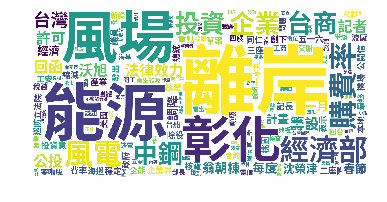

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# my_color_fig = np.array(Image.open("aaa.jpg"))
# image_colors = ImageColorGenerator(my_color_fig)

text = ','.join(words_list)

# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","一個","什麼","那個","二零一","二零二","零零"])

# 產生文字雲
wc = WordCloud(font_path="NotoSansCJKtc-Bold.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 250 ,        #文字雲顯示最大詞數
               width=1600,
               height=800,
               stopwords=stopwords)      #停用字詞

wc.generate(text)

# 視覺化呈現
# plt.figure(figsize=(20,10), dpi = 200)
# plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.imshow(wc)
plt.axis("off")
plt.savefig('wordcloud.png', bbox_inches='tight', dpi = 200)
plt.show()
# wc.to_file("first_review.png")